# **Bank Customer Churn Prediction System EDA Report**
---

# **Import the necessary libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from pandas.api.types import is_numeric_dtype, is_object_dtype

In [2]:
warnings.filterwarnings('ignore') 

# **Import the dataset**

In [3]:
dataset = pd.read_csv('./datasets/churn_dataset.csv')

# **Remove irrelevant features from the dataset**

In [4]:
dataset = dataset.drop(columns= ['CustomerId', 'Surname'])

# **Removing White Spaces From Features**

In [5]:
dataset.columns = dataset.columns.str.strip()

# **Dataset Analysis**

## **Shape of the Dataset**

In [6]:
dataset.shape

(10000, 15)

## **Data type of Each Feature**

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        10000 non-null  object 
 1   CreditScore      10000 non-null  float64
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  float64
 5   Tenure           10000 non-null  float64
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  float64
 8   HasCrCard        10000 non-null  float64
 9   Card Type        7055 non-null   object 
 10  IsActiveMember   10000 non-null  float64
 11  EstimatedSalary  10000 non-null  float64
 12  Housing          10000 non-null  object 
 13  Loan             10000 non-null  object 
 14  Exited           10000 non-null  float64
dtypes: float64(9), object(6)
memory usage: 1.1+ MB


In [8]:
dataset.head()

,Education,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,Card Type,IsActiveMember,EstimatedSalary,Housing,Loan,Exited
0,tertiary,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,DIAMOND,1.0,101348.88,yes,yes,1.0
1,secondary,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,NaN,1.0,112542.58,yes,yes,0.0
2,unknown,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,DIAMOND,0.0,113931.57,yes,yes,1.0
3,unknown,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,0.0,93826.63,yes,yes,0.0
4,tertiary,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,GOLD,1.0,79084.10,yes,yes,0.0


In [9]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Cleaning the Dataset**

## **Checking for Missing Values**

In [10]:
dataset.isnull().sum()

Education             0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
Card Type          2945
IsActiveMember        0
EstimatedSalary       0
Housing               0
Loan                  0
Exited                0
dtype: int64

## **Handling Missing Values**

In [11]:
#FIXME: Fix the dataset
dataset['Card Type'] = dataset['Card Type'].where(dataset['HasCrCard'] == 1, 'None')

In [12]:
for column in dataset.columns.tolist():
    # Calculate null values and percentage
    null_count = dataset[column].isnull().sum()
    total_count = len(dataset[column])
    null_percentage = (null_count / total_count) * 100

    # Handle columns based on null percentage and data type
    if null_percentage < 50:
        # Fill missing values for numerical columns
        if is_numeric_dtype(dataset[column]):
            mean = dataset[column].mean()
            dataset[column].fillna(mean, inplace=True)
        # Fill missing values for categorical columns
        elif is_object_dtype(dataset[column]):
            mode = dataset[column].mode()[0]
            dataset[column].fillna(mode, inplace=True)
    # elif 50 <= null_percentage < 80:
    #     # TODO: Implement the data missing data handling
    #     print(f"Under development for column: {column}")
    else:   
        # Drop columns with more than 80% missing values
        dataset.drop(columns=column, inplace=True)


## **Checking and removing Duplicate Rows**

In [13]:
duplicate_row_count = dataset.duplicated().sum()
print(f'Duplicated Row Count: {duplicate_row_count}')
if duplicate_row_count > 0:
    dataset = dataset.drop_duplicates().reset_index(drop = True)

Duplicated Row Count: 0


# **Feature Analysis**

## **Visualizing the Churn and Non Churn Percentage**

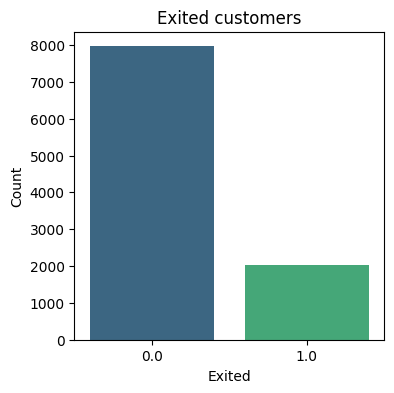

In [14]:
feature = dataset['Exited'].value_counts().reset_index()
feature.columns = ['Exited', 'Count']  
plt.figure(figsize=(4, 4))
sns.barplot(data=feature, x='Exited', y='Count', palette="viridis")
plt.title(f"Exited customers")
plt.xlabel('Exited')
plt.ylabel("Count")
plt.show()


**Insights**
1. Dataset is highly imbalanced **~80% not exited ~20% exited**.

## **Univariate Analysis**

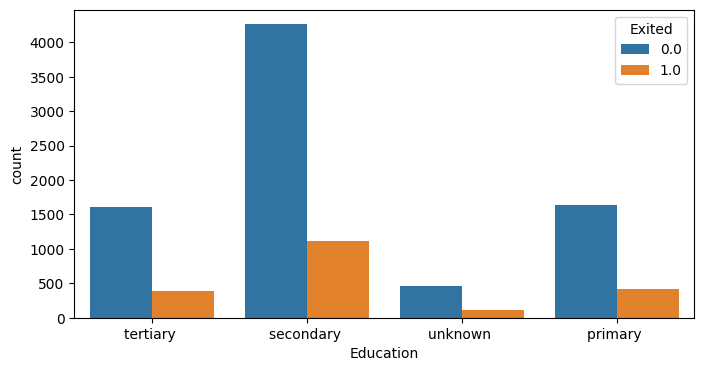

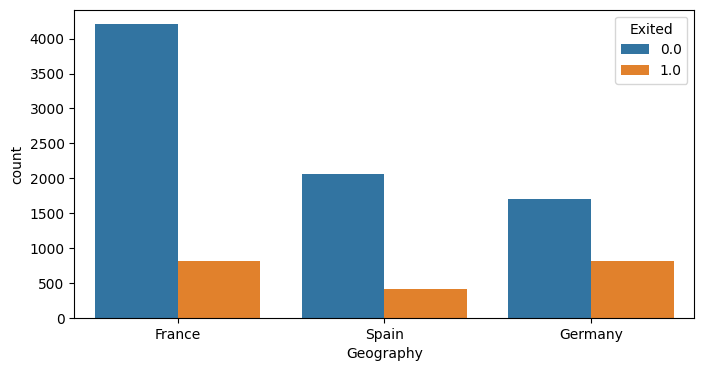

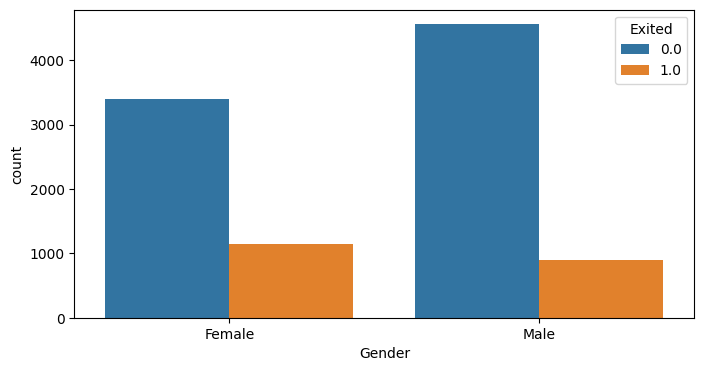

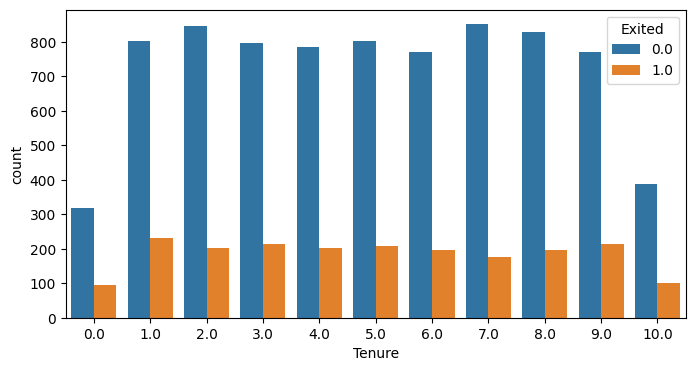

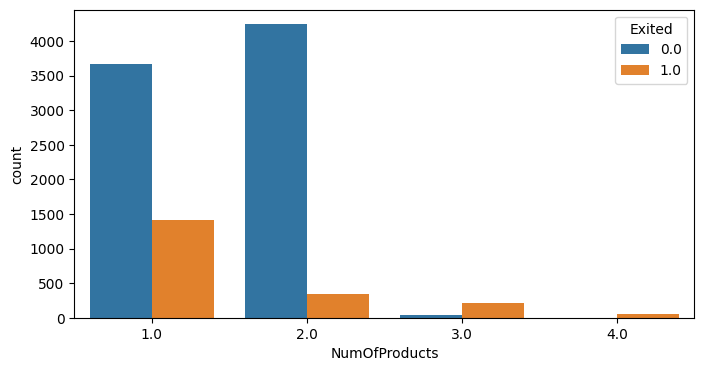

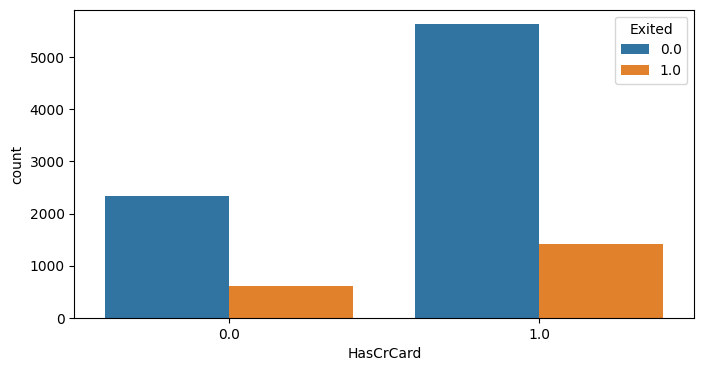

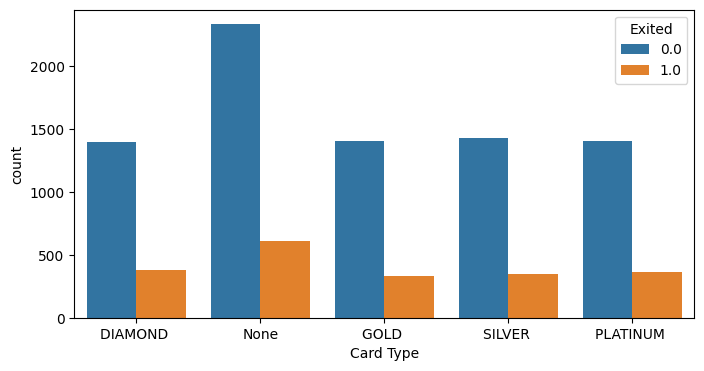

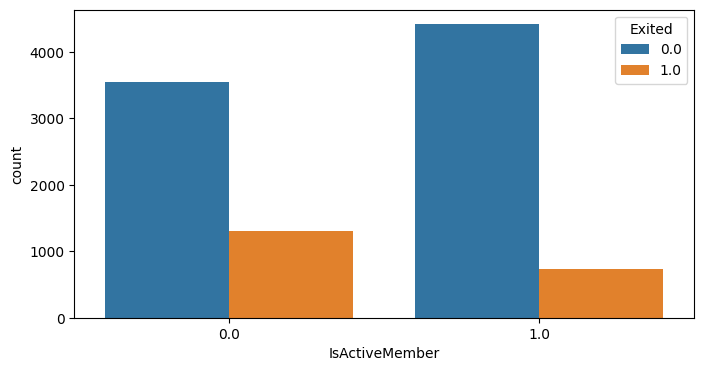

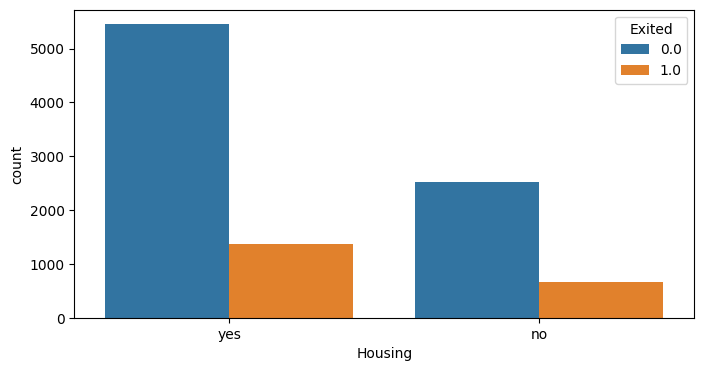

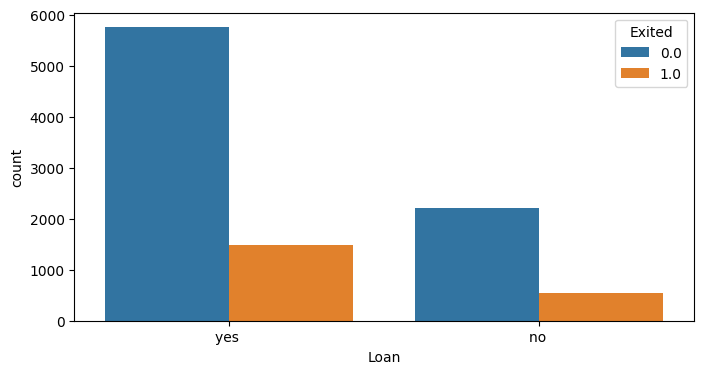

In [15]:
for i, predictor in enumerate(dataset.drop(columns=['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Exited'])):
    plt.figure(i, figsize=(8,4))
    sns.countplot(data=dataset, x=predictor, hue='Exited')

## **Grouping Age, Credit Score, Estimated salary and Balance into groups for better visualization**

In [16]:
dataset_grouped = dataset.copy()

# Age grouping
dataset_grouped['Age_Group'] = pd.cut(dataset_grouped['Age'], bins=[18, 39, 64, float('inf')], 
                                  labels=['Young Adult', 'Middle Adult', 'Late Adult'])

# Credit Score grouping
dataset_grouped['CreditScore_Group'] = pd.cut(dataset_grouped['CreditScore'], bins=[0, 500, 750, float('inf')], 
                                  labels=['Low', 'Medium', 'High'])

# Balance grouping
dataset_grouped['Balance_Group'] = pd.cut(dataset_grouped['Balance'], bins=[-1, 0, 75000, 120000, float('inf')], 
                                  labels=['Zero', 'Low', 'Medium', 'High'])

# Salary grouping
dataset_grouped['Salary_Group'] = pd.cut(dataset_grouped['EstimatedSalary'], bins=[0, 20000, 70000, float('inf')], 
                                  labels=['Low', 'Medium', 'High'])

dataset_grouped = dataset_grouped.drop(columns=['Age','CreditScore', 'Balance', 'EstimatedSalary'])
dataset_grouped.head()

,Education,Geography,Gender,Tenure,NumOfProducts,HasCrCard,Card Type,IsActiveMember,Housing,Loan,Exited,Age_Group,CreditScore_Group,Balance_Group,Salary_Group
0,tertiary,France,Female,2.0,1.0,1.0,DIAMOND,1.0,yes,yes,1.0,Middle Adult,Medium,Zero,High
1,secondary,Spain,Female,1.0,1.0,0.0,None,1.0,yes,yes,0.0,Middle Adult,Medium,Medium,High
2,unknown,France,Female,8.0,3.0,1.0,DIAMOND,0.0,yes,yes,1.0,Middle Adult,Medium,High,High
3,unknown,France,Female,1.0,2.0,0.0,None,0.0,yes,yes,0.0,Young Adult,Medium,Zero,High
4,tertiary,Spain,Female,2.0,1.0,1.0,GOLD,1.0,yes,yes,0.0,Middle Adult,High,High,High


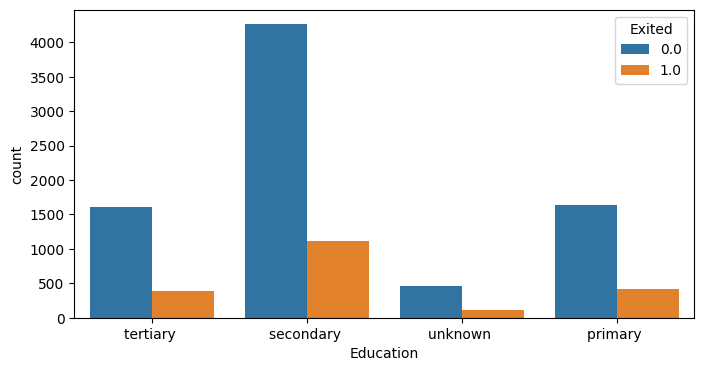

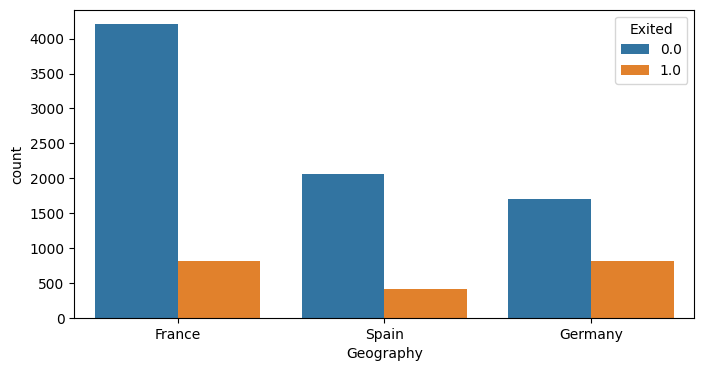

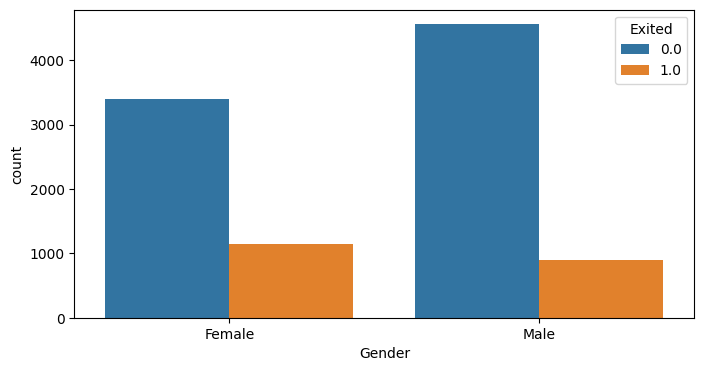

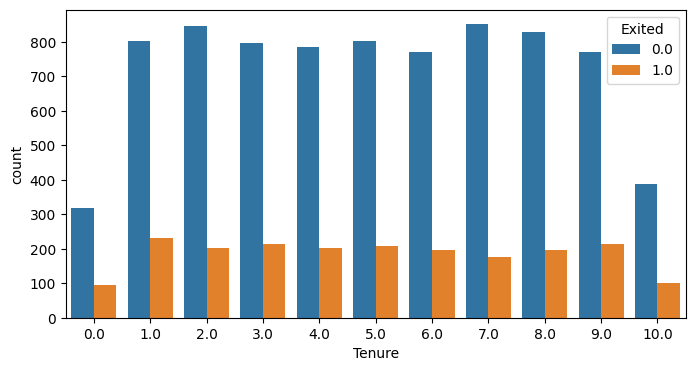

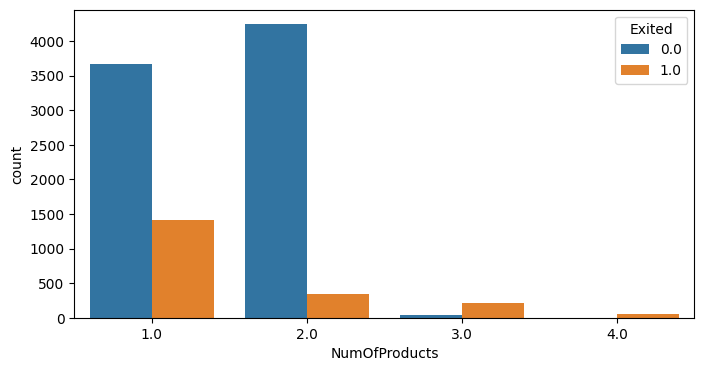

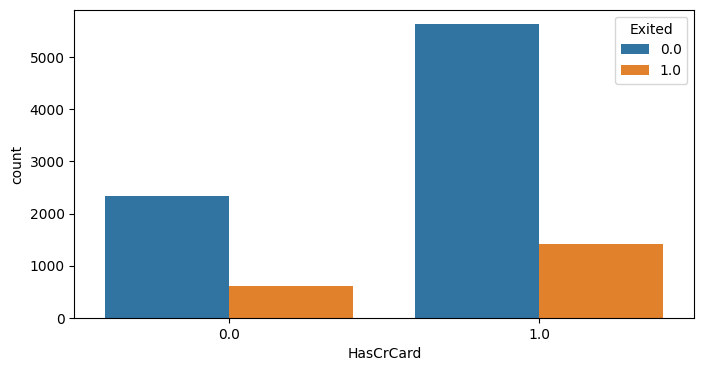

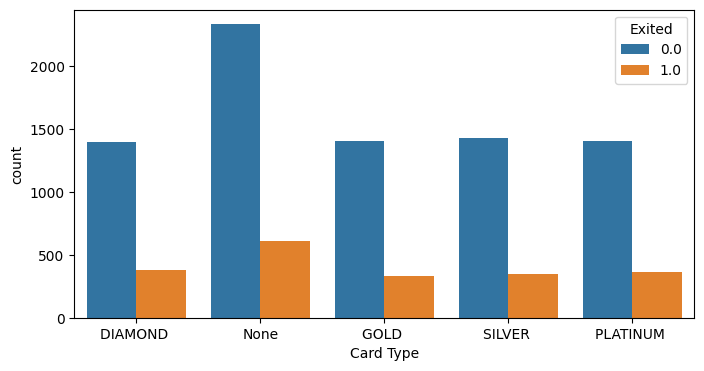

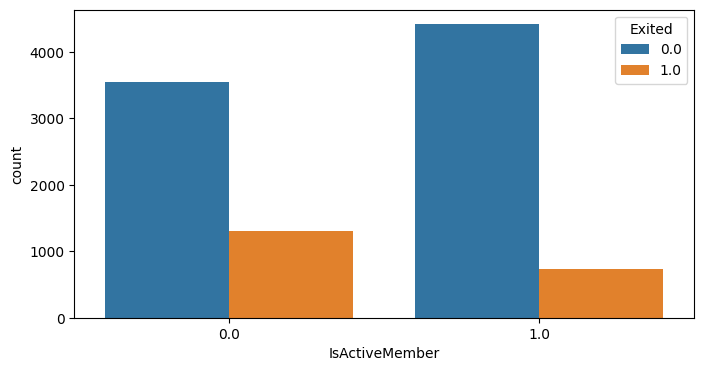

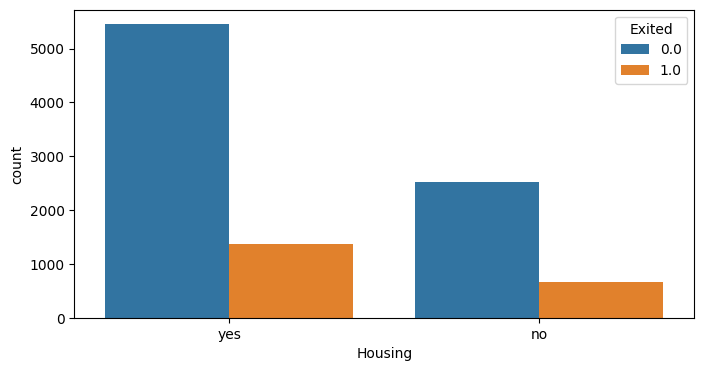

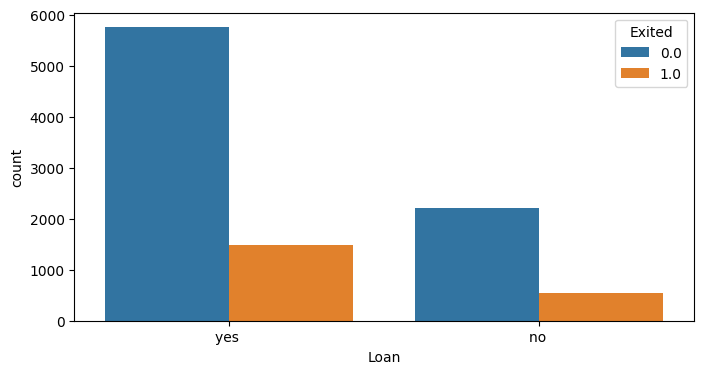

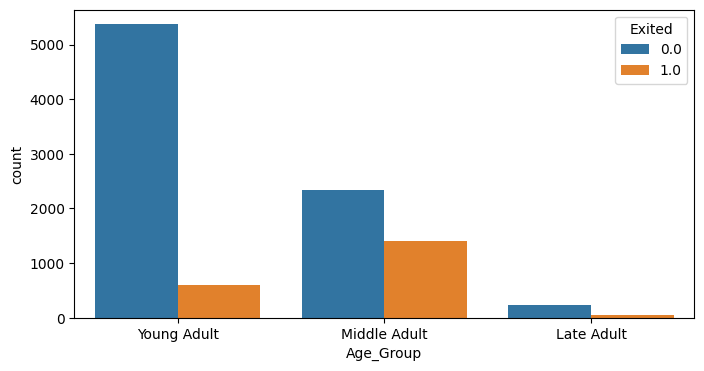

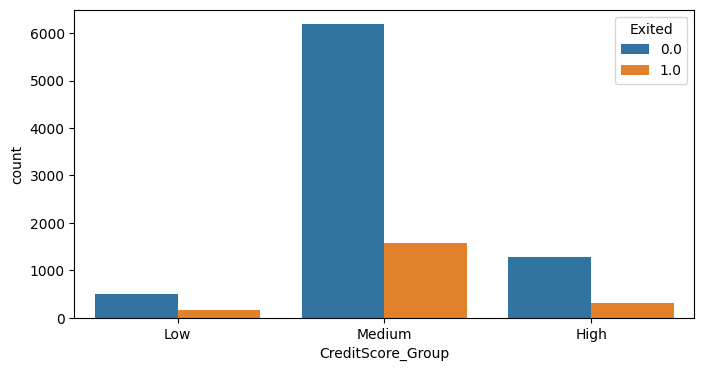

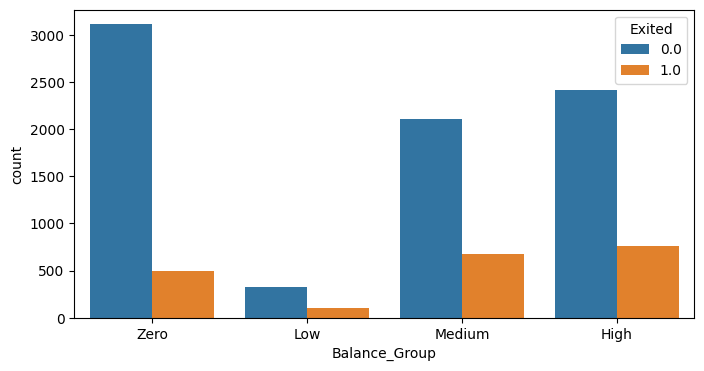

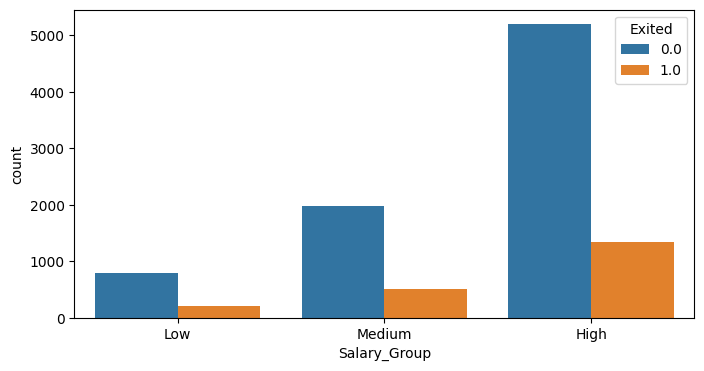

In [17]:
for i, predictor in enumerate(dataset_grouped.drop(columns=['Exited'])):
    plt.figure(i, figsize=(8,4))
    sns.countplot(data=dataset_grouped, x=predictor, hue='Exited')

## **Multivariate Analysis**

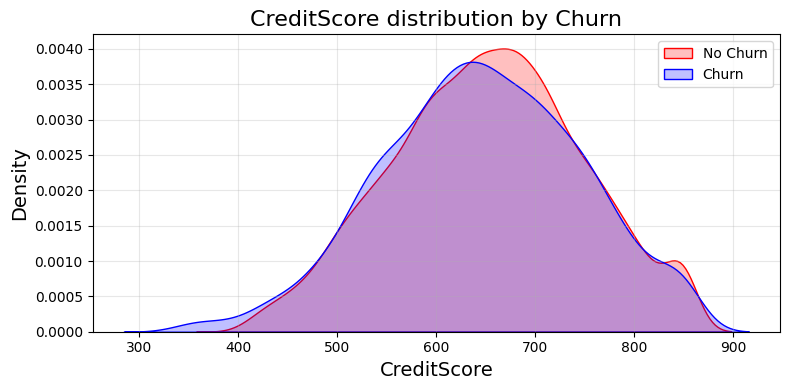

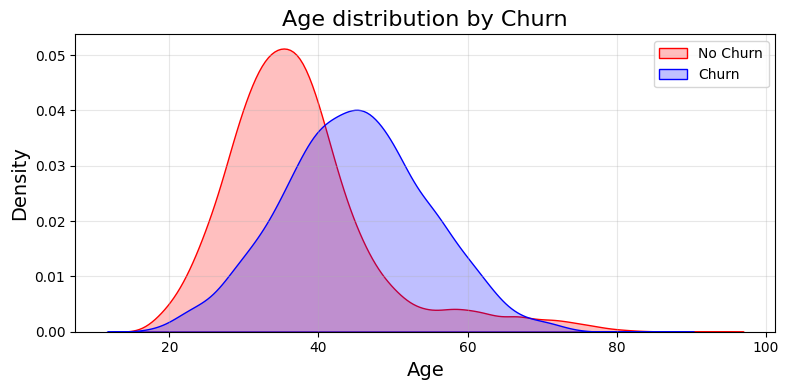

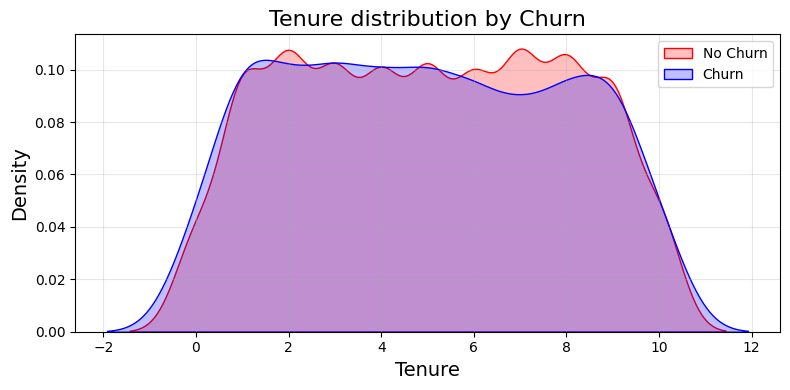

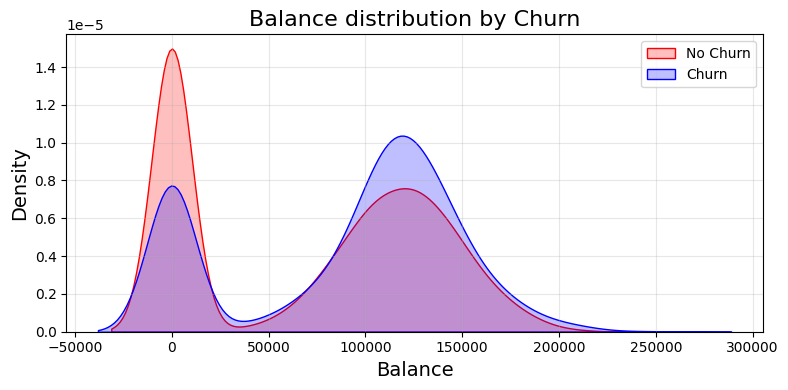

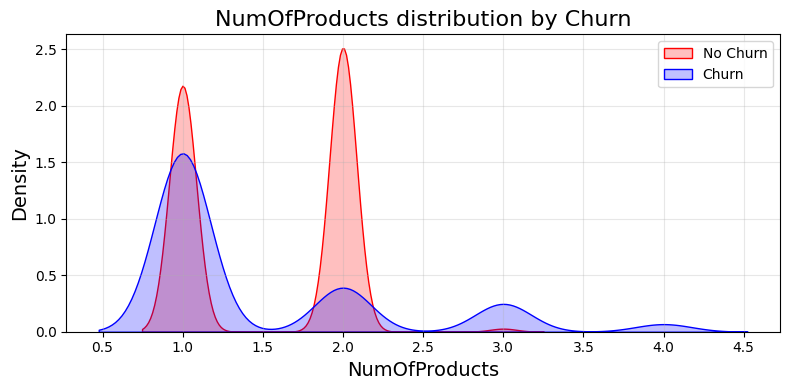

In [18]:
selected_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts']

def plot_KD(feature):
    plt.figure(i, figsize=(8,4))
    sns.kdeplot(dataset[feature][(dataset["Exited"] == 0)],
                color="Red", fill=True, label="No Churn")
    sns.kdeplot(dataset[feature][(dataset["Exited"] == 1)],
                color="Blue", fill=True, label="Churn")

    plt.legend(loc='upper right')
    plt.title(f'{feature} distribution by Churn', fontsize=16)
    plt.xlabel(f'{feature}', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.show()   


for feature in selected_features:
    plot_KD(feature) 

**Insights**
1. Customers in middle age shows a high likelihood to churn.
2. Customers who only only own one product shows high likelihood to churn than others.

## **Correlation Matrix: Before Encoding**

In [19]:
correlation_bef = dataset.drop(columns=['Education', 'Geography', 'Gender', 'Card Type', 'Housing', 'Loan'])

<Axes: >

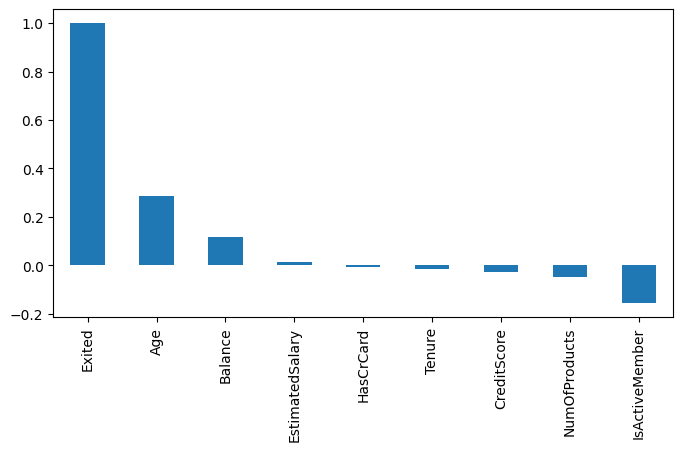

In [20]:
plt.figure(i, figsize=(8,4))
correlation_bef.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

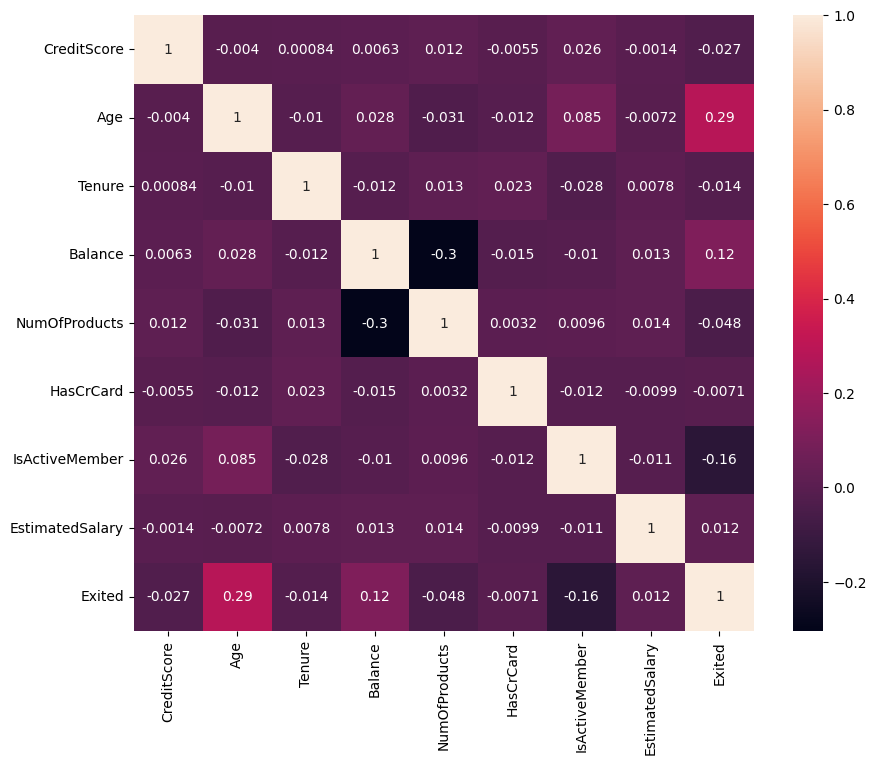

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_bef.corr(), annot=True)

## **Detecting and Handling Outliers**

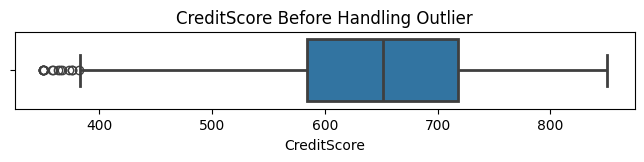

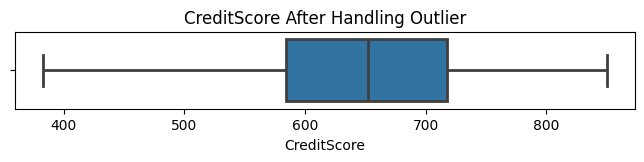

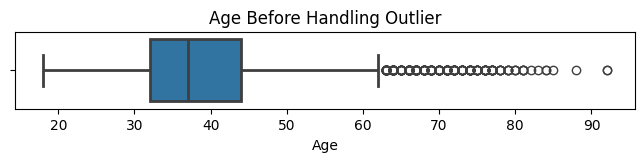

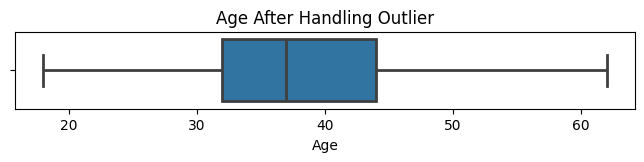

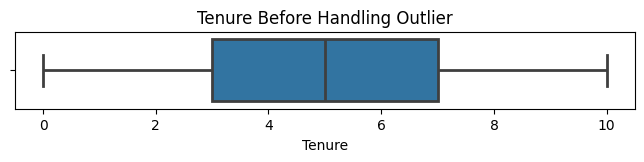

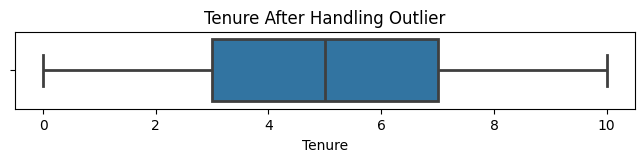

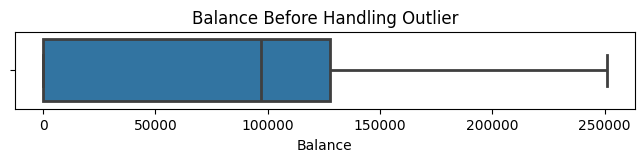

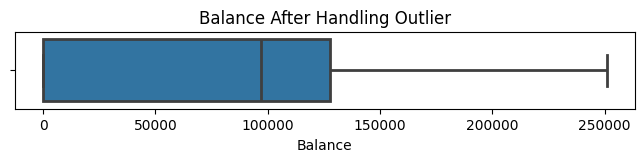

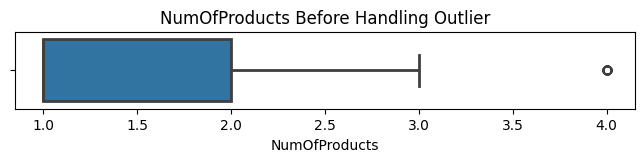

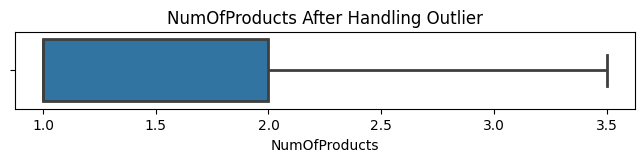

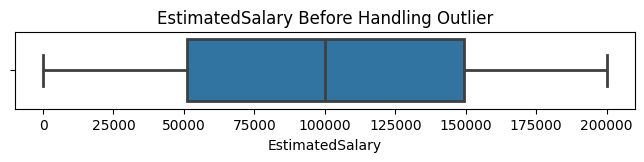

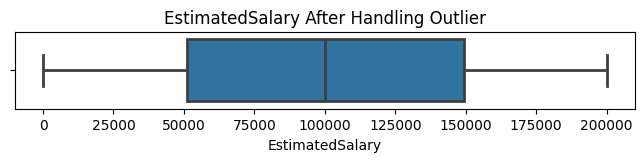

In [ ]:
def handleOutliers(feature):
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    dataset[feature] = np.clip(dataset[feature], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

    plt.figure(figsize=(8, 1))
    sns.boxplot(x=dataset[feature], linewidth=2)
    plt.title(f'{feature} After Handling Outlier')
    plt.show()

for index, feature in enumerate(dataset.drop(columns=['Education', 'Geography', 'Gender', 'Card Type', 'IsActiveMember', 'HasCrCard', 'Housing', 'Loan', 'Exited'])):
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=dataset[feature], linewidth=2)
    plt.title(f'{feature} Before Handling Outlier')
    plt.show()

    handleOutliers(feature)

## **One Hot Encoding**

In [23]:
encoded = pd.get_dummies(dataset[['Geography','Education','Card Type']], drop_first=True).astype(float)
dataset = pd.concat([dataset, encoded], axis=1)
dataset = dataset.drop(columns=['Geography','Education', 'Card Type'])

In [24]:
dataset.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Housing,...,Exited,Geography_Germany,Geography_Spain,Education_secondary,Education_tertiary,Education_unknown,Card Type_GOLD,Card Type_None,Card Type_PLATINUM,Card Type_SILVER
0,619.0,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,yes,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,608.0,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,yes,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,502.0,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,yes,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,699.0,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,850.0,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,yes,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,645.0,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,yes,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,822.0,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,383.0,Female,29.0,4.0,115046.74,3.5,1.0,0.0,119346.88,no,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,501.0,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,yes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,684.0,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,yes,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## **Label Encoding**

In [ ]:
labelEncoder = LabelEncoder()
dataset['Gender'] = labelEncoder.fit_transform(dataset['Gender'])
dataset['Housing'] = labelEncoder.fit_transform(dataset['Housing'])
dataset['Loan'] = labelEncoder.fit_transform(dataset['Loan'])

dataset['Gender'] = dataset['Gender'].astype(float)
dataset['Housing'] = dataset['Housing'].astype(float)
dataset['Loan'] = dataset['Loan'].astype(float)

# Moving the Y predictor to the end of the dataset
feature_exited = dataset['Exited']
dataset = dataset.drop(columns=['Exited'])
dataset = pd.concat([dataset, feature_exited], axis=1)

dataset.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Housing,...,Geography_Germany,Geography_Spain,Education_secondary,Education_tertiary,Education_unknown,Card Type_GOLD,Card Type_None,Card Type_PLATINUM,Card Type_SILVER,Exited
0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,645.0,1.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,822.0,1.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,383.0,0.0,29.0,4.0,115046.74,3.5,1.0,0.0,119346.88,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,501.0,1.0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,684.0,1.0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## **Correlation Matrix: After Encoding**

In [26]:
dataset.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Housing,...,Geography_Germany,Geography_Spain,Education_secondary,Education_tertiary,Education_unknown,Card Type_GOLD,Card Type_None,Card Type_PLATINUM,Card Type_SILVER,Exited
CreditScore,1.000000,-0.002929,-0.007703,0.000721,0.006389,0.012276,-0.005396,0.025537,-0.001150,0.012385,...,0.005563,0.004819,0.004183,0.003114,-0.000082,0.016701,0.005396,-0.023425,-0.002602,-0.026455
Gender,-0.002929,1.000000,-0.028953,0.014733,0.012087,-0.020410,0.005766,0.022544,-0.008112,0.012253,...,-0.024628,0.016889,-0.004120,0.013683,0.007367,0.038697,-0.005766,-0.008755,-0.009830,-0.106512
Age,-0.007703,-0.028953,1.000000,-0.011163,0.033021,-0.036776,-0.012717,0.072455,-0.007392,-0.004721,...,0.050767,-0.001207,0.011522,0.000600,-0.017230,-0.002332,0.012717,0.002863,-0.010904,0.312436
Tenure,0.000721,0.014733,-0.011163,1.000000,-0.012254,0.013194,0.022583,-0.028362,0.007784,-0.000837,...,-0.000567,0.003868,0.013120,-0.017953,0.027572,0.016854,-0.022583,-0.004861,0.016305,-0.014001
Balance,0.006389,0.012087,0.033021,-0.012254,1.000000,-0.311810,-0.014858,-0.010084,0.012797,-0.002943,...,0.401110,-0.134892,0.005253,0.008469,-0.008084,0.003066,0.014858,-0.012262,-0.016975,0.118533
NumOfProducts,0.012276,-0.020410,-0.036776,0.013194,-0.311810,1.000000,0.003504,0.010142,0.014065,-0.010526,...,-0.012440,0.010820,-0.021376,0.013463,0.013648,-0.017727,-0.003504,0.019569,0.014073,-0.059196
HasCrCard,-0.005396,0.005766,-0.012717,0.022583,-0.014858,0.003504,1.000000,-0.011866,-0.009933,-0.008996,...,0.010577,-0.013480,0.001992,-0.009814,-0.012718,0.296434,-1.000000,0.299010,0.300347,-0.007138
IsActiveMember,0.025537,0.022544,0.072455,-0.028362,-0.010084,0.010142,-0.011866,1.000000,-0.011421,-0.002557,...,-0.020486,0.016732,0.015775,-0.012340,-0.008717,-0.001984,0.011866,0.000716,0.013959,-0.156128
EstimatedSalary,-0.001150,-0.008112,-0.007392,0.007784,0.012797,0.014065,-0.009933,-0.011421,1.000000,0.000534,...,0.010297,-0.006482,0.004928,-0.004290,-0.002994,0.008367,0.009933,-0.003941,-0.000375,0.012097
Housing,0.012385,0.012253,-0.004721,-0.000837,-0.002943,-0.010526,-0.008996,-0.002557,0.000534,1.000000,...,-0.006753,0.008048,-0.021978,0.014739,0.020441,0.009828,0.008996,-0.013910,-0.002560,-0.011102


<Axes: >

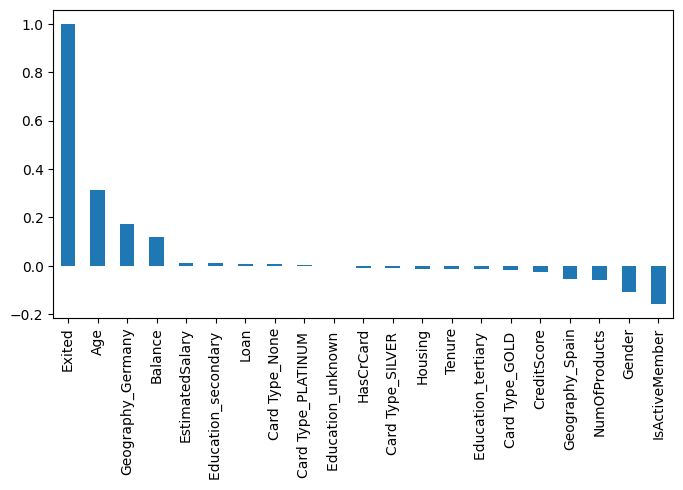

In [27]:
plt.figure(i, figsize=(8,4))
dataset.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

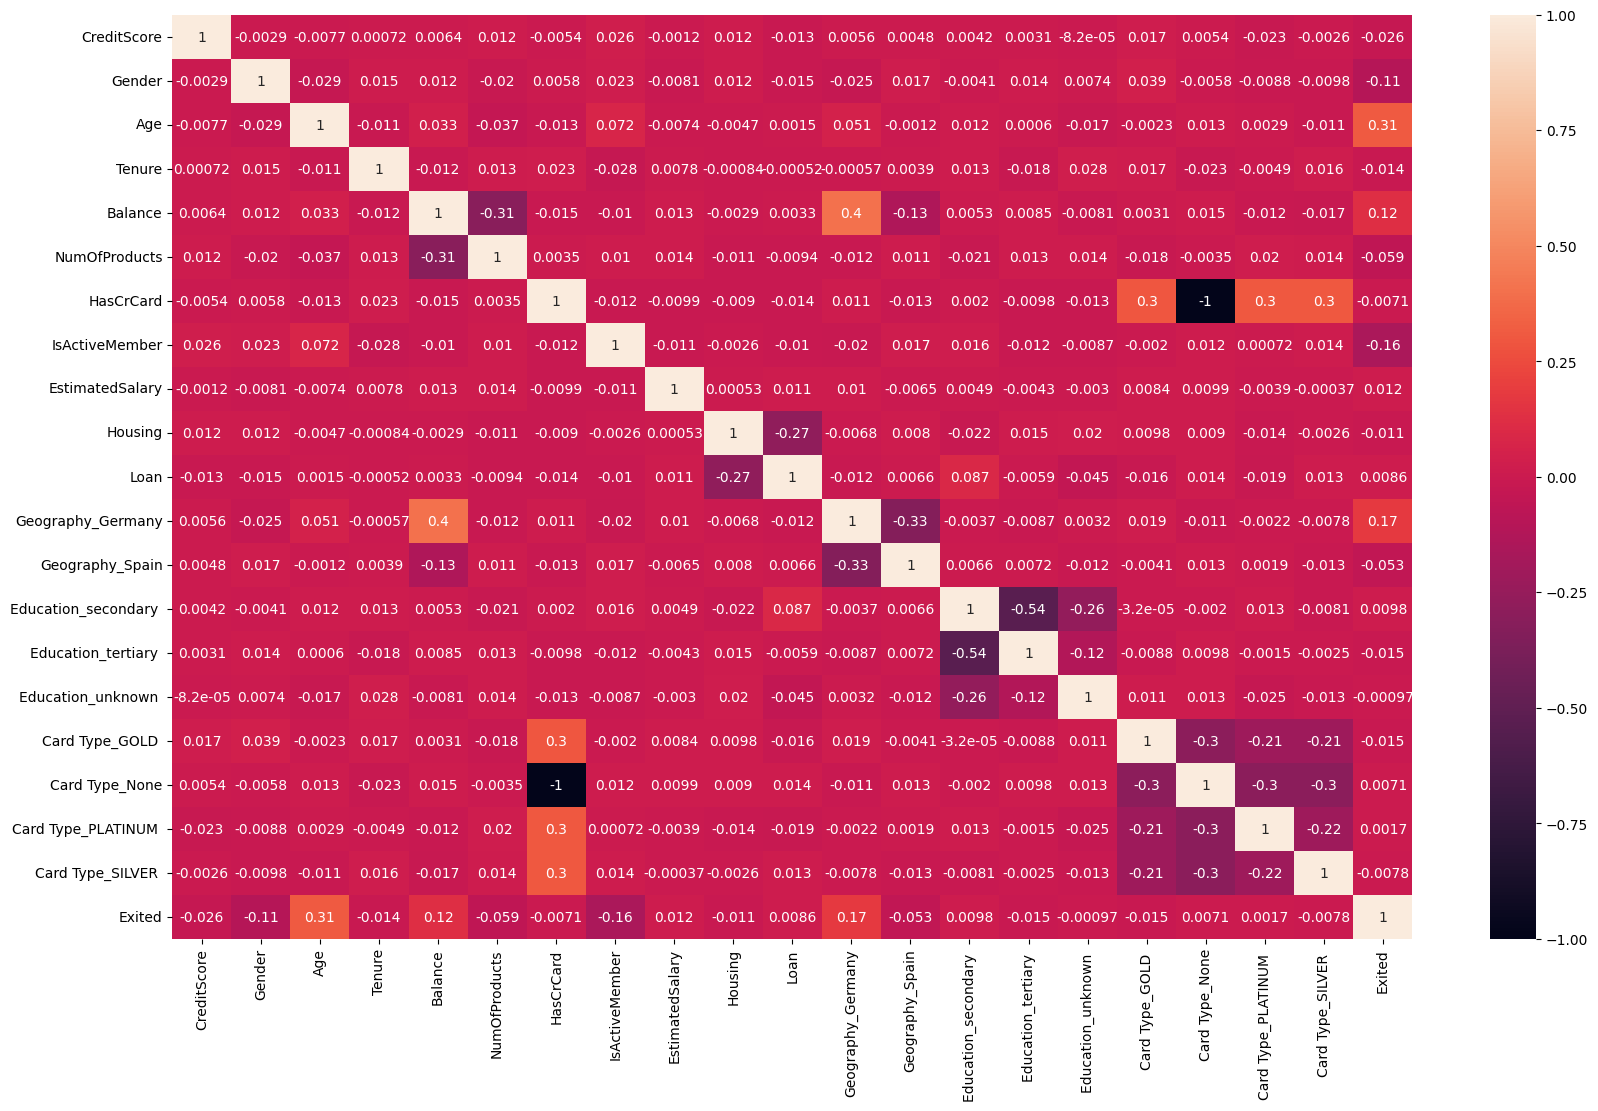

In [28]:
plt.figure(figsize=(20, 12))
sns.heatmap(dataset.corr(), annot=True)

#### **Insights**
1. **Age and Activity Level Matter Most: Older customers and inactive members are more likely to churn.**
2. **Balance Might Have an Effect: Higher balances show a slight tendency toward churn, but the correlation is weak.**
3. **Number of Products Has a Small Impact: Customers with more products tend to stay, but the effect is minor.**
4. **Tenure and Credit Cards Don’t Matter Much: These variables have little to no influence on churn.**
5. **Geography has a high impact: People in germany are shows a high likely and spain shows less likely to churn.**

# **Fix the Class Imbalance Using SMOTE**

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

categorical_features = [
    'Gender', 
    'HasCrCard', 'IsActiveMember', 
    'Housing', 'Loan','Geography_Germany', 
    'Geography_Spain', 'Education_secondary ',
    'Education_tertiary ', 'Education_unknown ', 
    'Card Type_GOLD ','Card Type_None', 
    'Card Type_PLATINUM ', 'Card Type_SILVER '
]

cat_indices = [X.columns.get_loc(col) for col in categorical_features]

smote = SMOTENC(categorical_features=cat_indices, k_neighbors=9, random_state=42)

overSampled_X, overSampled_y = smote.fit_resample(X, y)

dataset_overSampled = pd.concat([overSampled_X, overSampled_y], axis=1)

## **Check the New Class Balance**

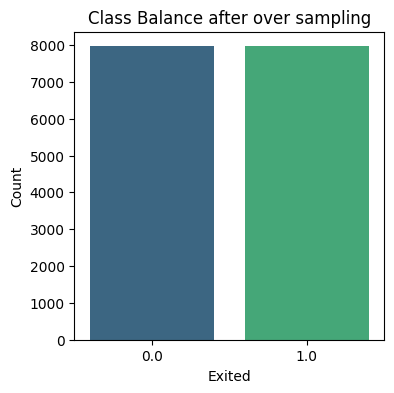

In [30]:
feature = dataset_overSampled['Exited'].value_counts().reset_index()
feature.columns = ['Exited', 'Count']  
plt.figure(figsize=(4, 4))
sns.barplot(data=feature, x='Exited', y='Count', palette="viridis")
plt.title(f"Class Balance after over sampling")
plt.xlabel('Exited')
plt.ylabel("Count")
plt.show()

<Axes: >

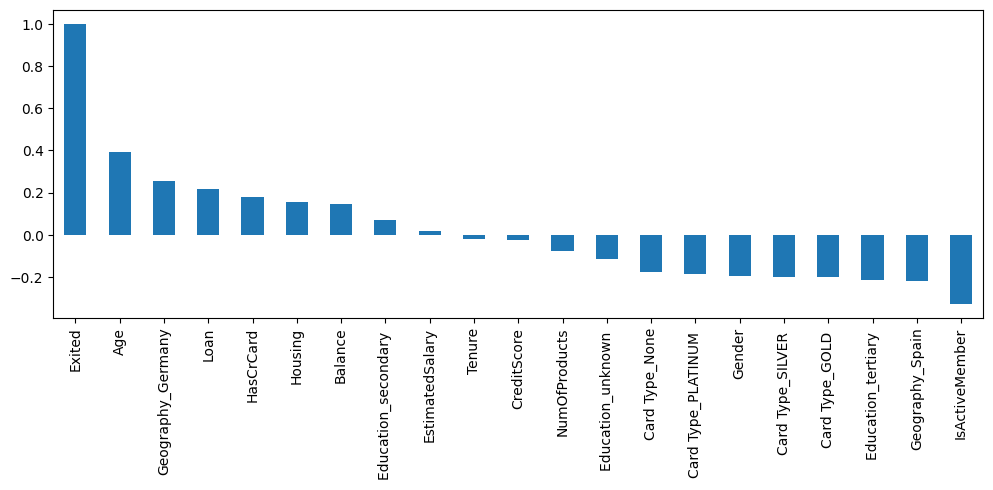

In [31]:
plt.figure(figsize=(12, 4))
dataset_overSampled.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

# **Correlation difference**

<Axes: >

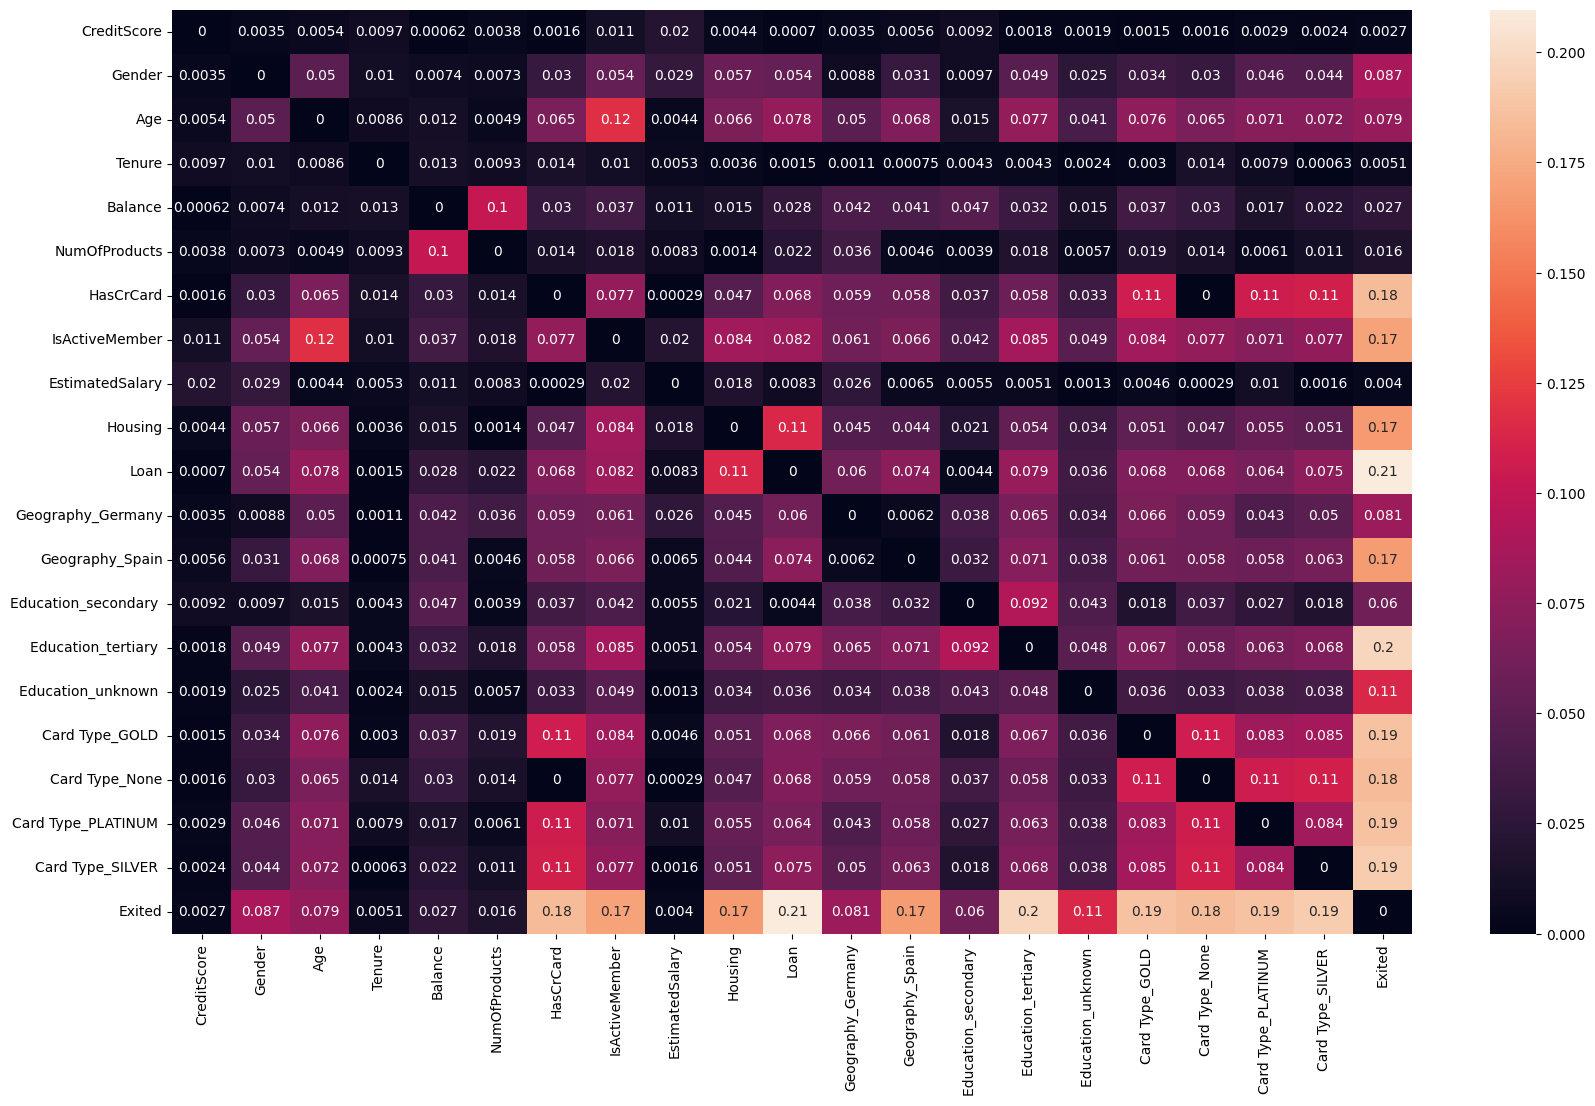

In [32]:
correlation_diff = (dataset_overSampled.corr() - dataset.corr()).abs()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_diff, annot=True)